In [98]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as plot

In [99]:
test_df = pd.read_csv('./Data/act_test.csv')
test_df.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


In [100]:
train_df = pd.read_csv('./Data/act_train.csv')
train_df.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [101]:
people_df = pd.read_csv('./Data/people.csv')
people_df.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


## Preprocessing the Input data sets

In [102]:
# since the data columns are similar in
people_df['date'] = pd.to_datetime(people_df['date'])
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [103]:
# Convert similarly named terms in the two datasets ...
# ppl = people_df.rename(columns=dict({name: '_'.join(['ppl', name]) for name in people_df.columns if 'char' in name},
#                                     **{'date': 'ppl_date', 'group_1': 'ppl_group', 'people_id': 'ppl_id'}))

In [104]:
# activ = train_df.rename(columns=dict({name: '_'.join(['act', name]) for name in train_df.columns if 'char' in name},
#                                      **{'activity_category': 'act_category', 'date': 'act_date',
#                                         'activity_id': 'act_id', 'outcome': 'act_outcome', 'people_id': 'ppl_id'}))
# activ.columns

In [105]:
people_df

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189113,ppl_99987,type 1,group 8600,type 1,2022-04-02,type 4,type 6,type 4,type 3,type 11,...,False,False,False,True,False,True,False,True,True,89
189114,ppl_9999,type 2,group 17304,type 2,2023-02-23,type 6,type 2,type 8,type 3,type 11,...,False,False,False,False,False,False,False,False,False,0
189115,ppl_99992,type 2,group 17304,type 2,2020-06-25,type 5,type 5,type 3,type 4,type 16,...,False,False,False,False,False,False,False,False,False,0
189116,ppl_99994,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,...,True,True,True,True,False,True,True,True,True,95


In [106]:
train_df.columns

Index(['people_id', 'activity_id', 'date', 'activity_category', 'char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10', 'outcome'],
      dtype='object')

In [107]:
## Renaming the similarly named columns keeping primary and foreign key consistent :
people_df.columns = ['ppl_' + str(col) for col in people_df.columns]
people_df.rename(columns={'ppl_people_id': 'people_id', 'ppl_group_1': 'ppl_group'}, inplace=True)
train_df.columns = ['act_' + str(col) for col in train_df.columns]
train_df.rename(columns={'act_people_id': 'people_id', 'act_activity_category': 'activity_category',
                         'act_activity_id': 'activity_id', 'act_outcome': 'outcome'}, inplace=True)
test_df.columns = ['act_' + str(col) for col in test_df.columns]
test_df.rename(columns={'act_people_id': 'people_id', 'act_activity_category': 'activity_category',
                        'act_activity_id': 'activity_id', 'act_outcome': 'outcome'}, inplace=True)


In [108]:
people_df

,people_id,ppl_char_1,ppl_group,ppl_char_2,ppl_date,ppl_char_3,ppl_char_4,ppl_char_5,ppl_char_6,ppl_char_7,...,ppl_char_29,ppl_char_30,ppl_char_31,ppl_char_32,ppl_char_33,ppl_char_34,ppl_char_35,ppl_char_36,ppl_char_37,ppl_char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189113,ppl_99987,type 1,group 8600,type 1,2022-04-02,type 4,type 6,type 4,type 3,type 11,...,False,False,False,True,False,True,False,True,True,89
189114,ppl_9999,type 2,group 17304,type 2,2023-02-23,type 6,type 2,type 8,type 3,type 11,...,False,False,False,False,False,False,False,False,False,0
189115,ppl_99992,type 2,group 17304,type 2,2020-06-25,type 5,type 5,type 3,type 4,type 16,...,False,False,False,False,False,False,False,False,False,0
189116,ppl_99994,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,...,True,True,True,True,False,True,True,True,True,95


In [109]:
train_df

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 418,1
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1832,1
2197288,ppl_99994,act2_536973,2023-01-19,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
2197289,ppl_99994,act2_688656,2023-05-02,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 199,1


In [110]:
test_df

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498682,ppl_99997,act2_4367092,2023-04-22,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
498683,ppl_99997,act2_4404220,2022-11-12,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
498684,ppl_99997,act2_448830,2022-08-02,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
498685,ppl_99997,act2_450133,2022-08-02,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1


In [111]:
## Checking for null values :
# People dataset
print('People data null values : \n')
print(people_df.isnull().sum())
print('-----------------------------------------------------------------\n')
print('Train data null values : \n')
print(train_df.isnull().sum())
print('-----------------------------------------------------------------\n')
print('Test data null values : \n')
print(test_df.isnull().sum())
print('-----------------------------------------------------------------\n')

People data null values : 

people_id      0
ppl_char_1     0
ppl_group      0
ppl_char_2     0
ppl_date       0
ppl_char_3     0
ppl_char_4     0
ppl_char_5     0
ppl_char_6     0
ppl_char_7     0
ppl_char_8     0
ppl_char_9     0
ppl_char_10    0
ppl_char_11    0
ppl_char_12    0
ppl_char_13    0
ppl_char_14    0
ppl_char_15    0
ppl_char_16    0
ppl_char_17    0
ppl_char_18    0
ppl_char_19    0
ppl_char_20    0
ppl_char_21    0
ppl_char_22    0
ppl_char_23    0
ppl_char_24    0
ppl_char_25    0
ppl_char_26    0
ppl_char_27    0
ppl_char_28    0
ppl_char_29    0
ppl_char_30    0
ppl_char_31    0
ppl_char_32    0
ppl_char_33    0
ppl_char_34    0
ppl_char_35    0
ppl_char_36    0
ppl_char_37    0
ppl_char_38    0
dtype: int64
-----------------------------------------------------------------

Train data null values : 

people_id                  0
activity_id                0
act_date                   0
activity_category          0
act_char_1           2039676
act_char_2           20

In [112]:
test_df.dtypes

people_id                    object
activity_id                  object
act_date             datetime64[ns]
activity_category            object
act_char_1                   object
act_char_2                   object
act_char_3                   object
act_char_4                   object
act_char_5                   object
act_char_6                   object
act_char_7                   object
act_char_8                   object
act_char_9                   object
act_char_10                  object
dtype: object

In [113]:
for column in test_df.columns.to_list()[4:]:
    print(column)
    test_df.loc[test_df[column].isnull(), column] = "type -1"

act_char_1
act_char_2
act_char_3
act_char_4
act_char_5
act_char_6
act_char_7
act_char_8
act_char_9
act_char_10


In [114]:
for column in train_df.columns.to_list()[4:14]:
    print(column)
    train_df.loc[train_df[column].isnull(), column] = "type -1"

act_char_1
act_char_2
act_char_3
act_char_4
act_char_5
act_char_6
act_char_7
act_char_8
act_char_9
act_char_10


In [115]:
# sorting of columns
people_df = people_df[['people_id', 'ppl_date',  'ppl_group', 'ppl_char_1', 'ppl_char_2'] + people_df.columns[5:].to_list()]
# Converting features to category format for People dataset:
people_columns = people_df.columns.to_list()[3:12]
# people_df[['ppl_group'] + people_columns] = people_df[['ppl_group'] + people_columns].astype('category')

In [116]:
# Converting features to category format for activity train and test data:
activity_category = test_df.columns.to_list()[3:14]
# test_df[activity_category] = test_df[activity_category].astype('category')
# train_df[activity_category] = train_df[activity_category].astype('category')

In [117]:
people_df.dtypes

people_id              object
ppl_date       datetime64[ns]
ppl_group              object
ppl_char_1             object
ppl_char_2             object
ppl_char_3             object
ppl_char_4             object
ppl_char_5             object
ppl_char_6             object
ppl_char_7             object
ppl_char_8             object
ppl_char_9             object
ppl_char_10              bool
ppl_char_11              bool
ppl_char_12              bool
ppl_char_13              bool
ppl_char_14              bool
ppl_char_15              bool
ppl_char_16              bool
ppl_char_17              bool
ppl_char_18              bool
ppl_char_19              bool
ppl_char_20              bool
ppl_char_21              bool
ppl_char_22              bool
ppl_char_23              bool
ppl_char_24              bool
ppl_char_25              bool
ppl_char_26              bool
ppl_char_27              bool
ppl_char_28              bool
ppl_char_29              bool
ppl_char_30              bool
ppl_char_3

In [118]:
train_df.head()

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0


## Exploratory Data Analysis

In [119]:
print("Shape of Train data:", train_df.shape)
print("Shape of People data:", people_df.shape)

Shape of Train data: (2197291, 15)
Shape of People data: (189118, 41)


In [120]:
# Merging people data and activity train data over people_id:
train_data = pd.merge(people_df, train_df, how ='inner', on = 'people_id')
train_data.head()

,people_id,ppl_date,ppl_group,ppl_char_1,ppl_char_2,ppl_char_3,ppl_char_4,ppl_char_5,ppl_char_6,ppl_char_7,...,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10,outcome
0,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 76,0
1,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
2,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
3,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
4,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0


In [121]:
print("Shape after combining Train data with People data", train_data.shape)

Shape after combining Train data with People data (2197291, 55)


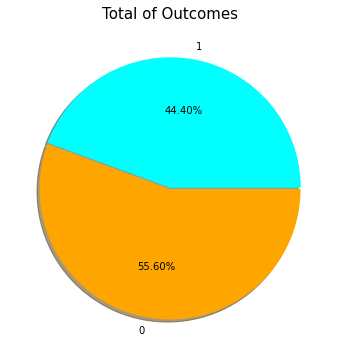

In [122]:
# Outcome bifurcation in train data set
import matplotlib.pyplot as plt
out1= train_data[train_data['outcome']==1].shape[0]
out0= train_data[train_data['outcome']==0].shape[0]

fig,axis = plt.subplots(figsize =(6,6))
axis.tick_params(axis="x", labelsize=16)
axis.tick_params(axis="y", labelsize=32)

axis.pie([out1,out0], labels=['1','0'],explode=(0, 0.01),shadow=True,colors=['cyan','orange'], autopct='%2.2f%%')
plt.title("Total of Outcomes",fontsize=15)
plt.show()

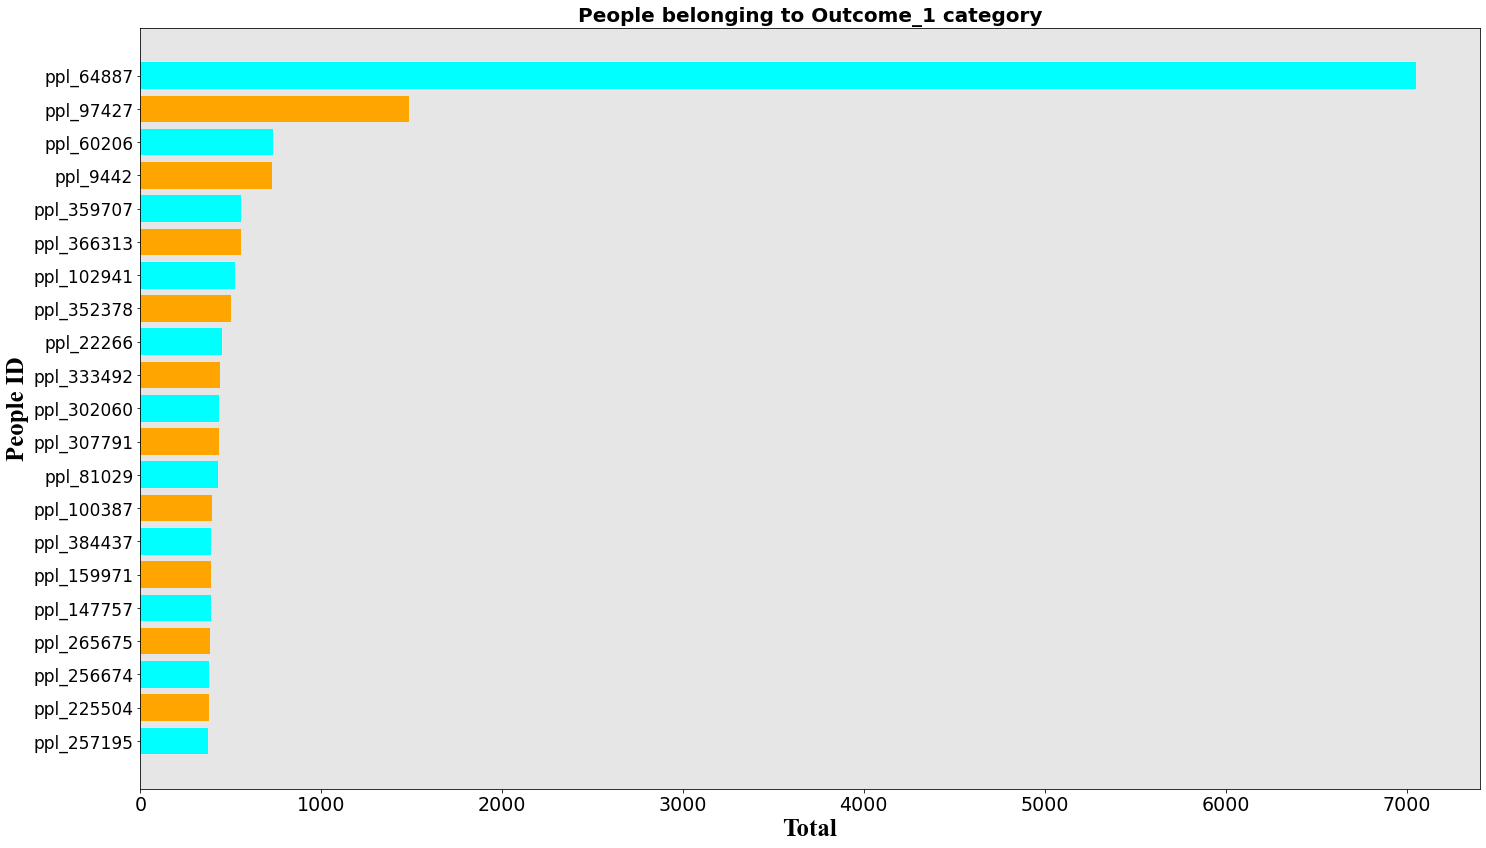

In [123]:
graph_values1 = train_data.loc[train_data['outcome']==1].groupby('people_id')['activity_id'].count().sort_values(ascending=False)[:21]
graph_values1 = graph_values1.sort_values()

fig1,axis1 = plt.subplots(figsize =(24,14))
axis1.tick_params(axis="x", labelsize=19)
axis1.tick_params(axis="y", labelsize=17)

axis1.barh(list(graph_values1.index), list(graph_values1.values),height = 0.8, color = ['cyan','orange'])
axis1.set_facecolor('#E0E0E0')
axis1.patch.set_alpha(0.8)
plt.title("People belonging to Outcome_1 category",fontsize=20,fontweight="bold")
plt.ylabel('People ID',fontsize = 25,fontweight="bold",fontname="Times New Roman")
plt.xlabel('Total',fontsize = 25,fontweight="bold",fontname="Times New Roman")
plt.show()

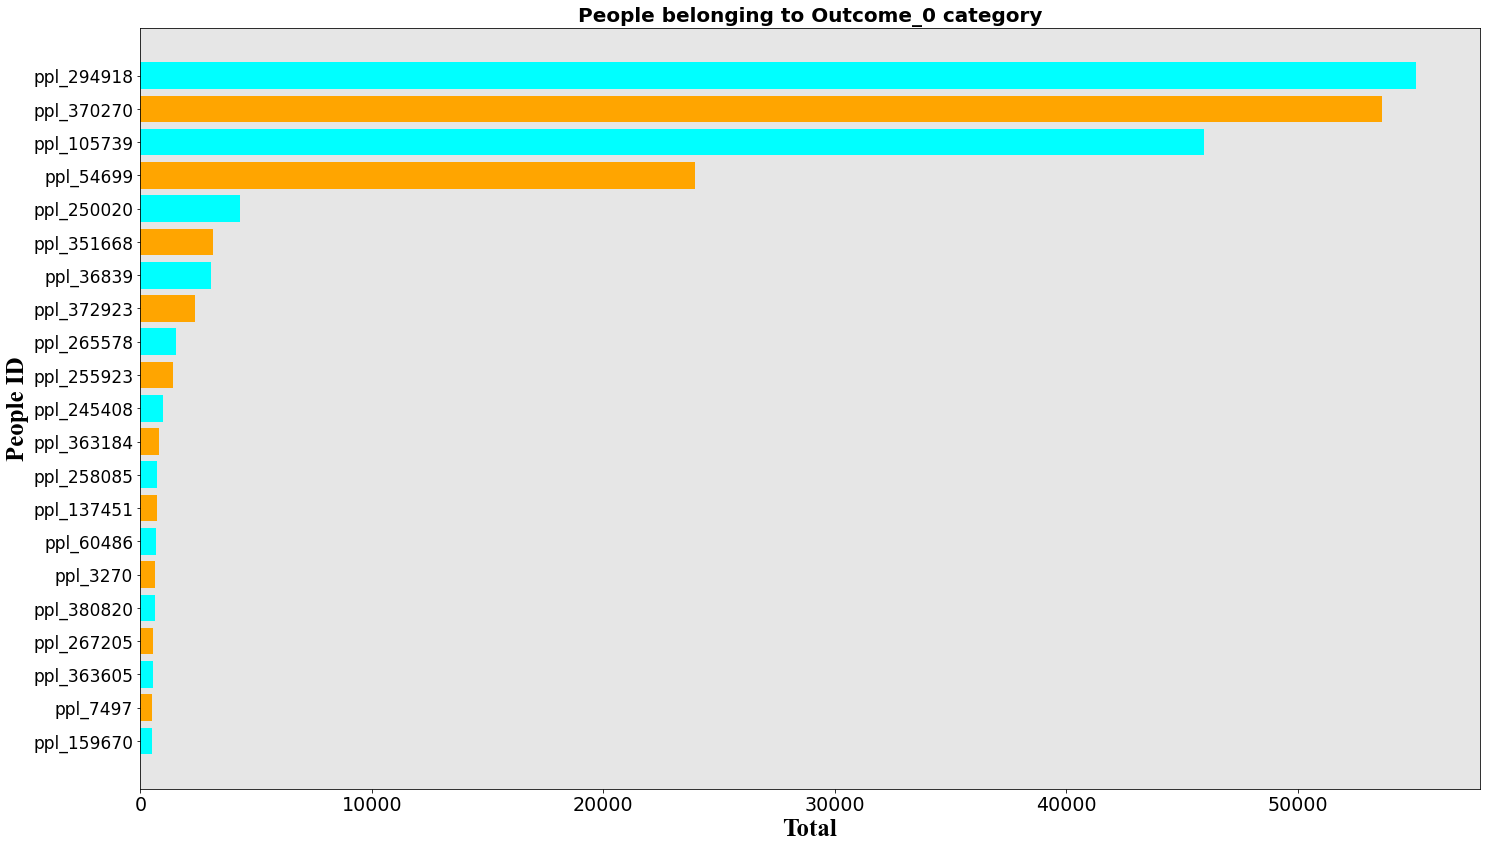

In [124]:
graph_values2 = train_data.loc[train_data['outcome']==0].groupby('people_id')['activity_id'].count().sort_values(ascending=False)[:21]
graph_values2 = graph_values2.sort_values()

fig2,axis2 = plt.subplots(figsize =(24,14))
axis2.tick_params(axis="x", labelsize=19)
axis2.tick_params(axis="y", labelsize=17)

axis2.barh(list(graph_values2.index), list(graph_values2.values),height = 0.8, color = ['cyan','orange'])
axis2.set_facecolor('#E0E0E0')
axis2.patch.set_alpha(0.8)
plt.title("People belonging to Outcome_0 category",fontsize=20,fontweight="bold")
plt.ylabel('People ID',fontsize = 25,fontweight="bold",fontname="Times New Roman")
plt.xlabel('Total',fontsize = 25,fontweight="bold",fontname="Times New Roman")
plt.show()

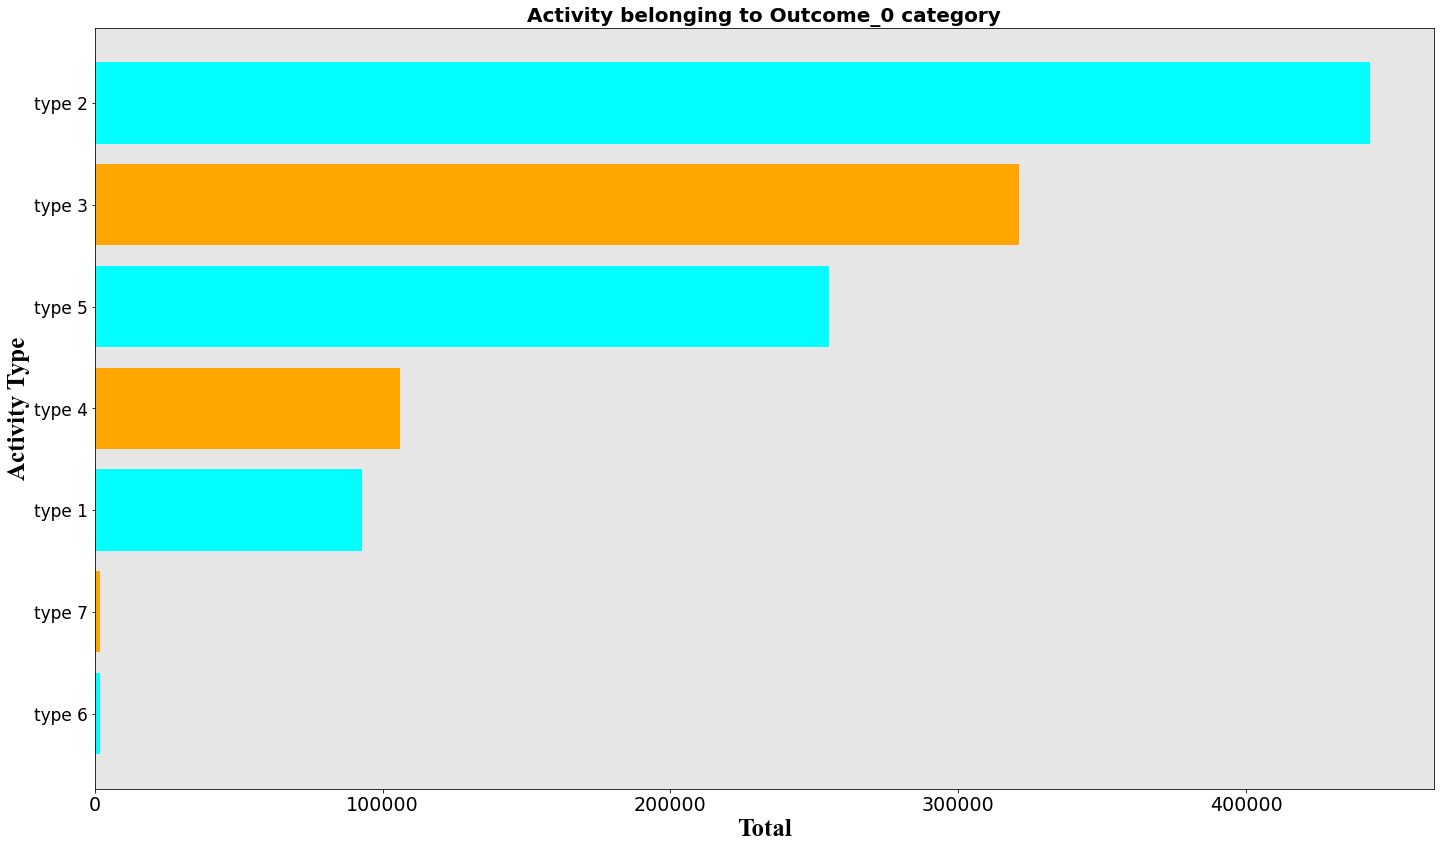

In [125]:
graph_values3 = train_data.loc[train_data['outcome']==0].groupby('activity_category')['activity_id'].count().sort_values(ascending=False)[:21]
graph_values3 = graph_values3.sort_values()

fig3,axis3 = plt.subplots(figsize =(24,14))
axis3.tick_params(axis="x", labelsize=19)
axis3.tick_params(axis="y", labelsize=17)

axis3.barh(list(graph_values3.index), list(graph_values3.values), height = 0.8, color = ['cyan','orange'])
axis3.set_facecolor('#E0E0E0')
axis3.patch.set_alpha(0.8)
plt.title("Activity belonging to Outcome_0 category",fontsize=20,fontweight="bold")
plt.ylabel('Activity Type',fontsize = 25,fontweight="bold",fontname="Times New Roman")
plt.xlabel('Total',fontsize = 25,fontweight="bold",fontname="Times New Roman")
plt.show()

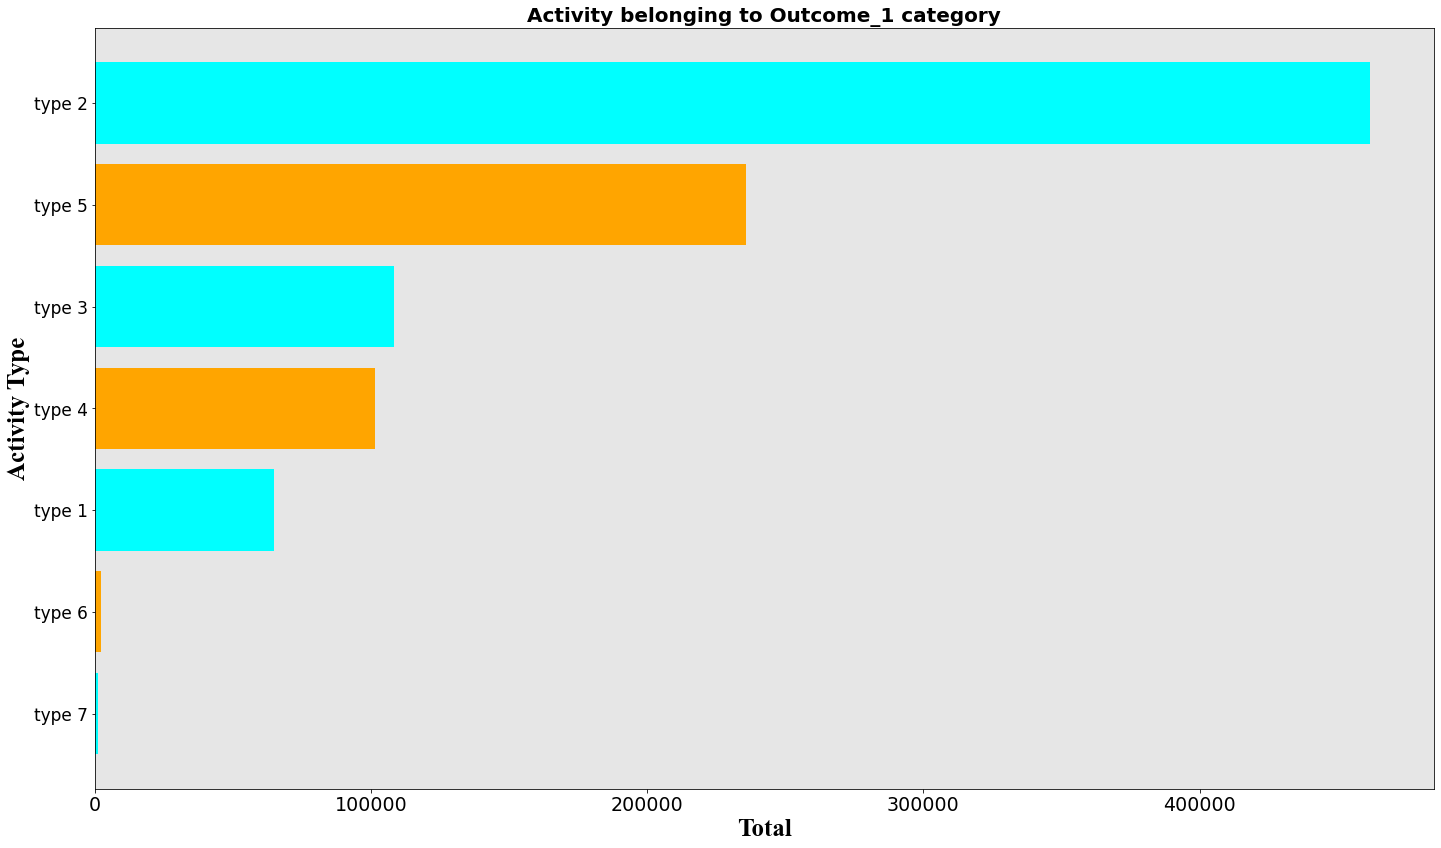

In [126]:
graph_values4 = train_data.loc[train_data['outcome']==1].groupby('activity_category')['activity_id'].count().sort_values(ascending=False)[:21]
graph_values4 = graph_values4.sort_values()

fig4,axis4 = plt.subplots(figsize =(24,14))
axis4.tick_params(axis="x", labelsize=19)
axis4.tick_params(axis="y", labelsize=17)

axis4.barh(list(graph_values4.index), list(graph_values4.values),height = 0.8, color = ['cyan','orange'])
axis4.set_facecolor('#E0E0E0')
axis4.patch.set_alpha(0.8)
plt.title("Activity belonging to Outcome_1 category",fontsize=20,fontweight="bold")
plt.ylabel('Activity Type',fontsize = 25,fontweight="bold",fontname="Times New Roman")
plt.xlabel('Total',fontsize = 25,fontweight="bold",fontname="Times New Roman")
plt.show()

In [127]:
train_data['weekday'] = train_data[['act_date']].apply(lambda x: dt.datetime.strftime(x['act_date'], '%A'), axis=1)
train_data['monthday'] = train_data.act_date.dt.day
train_data["month"] = train_data.act_date.dt.month

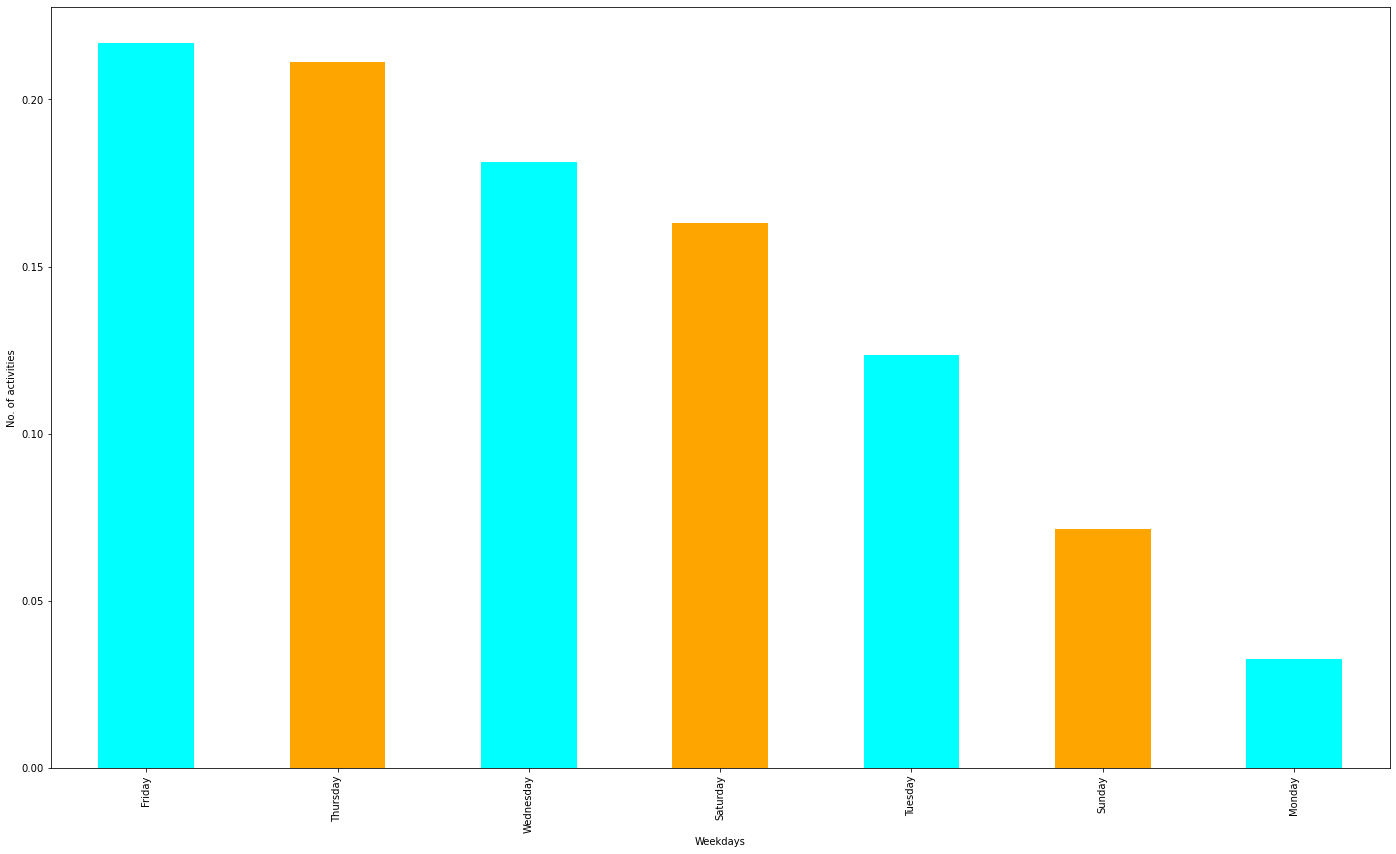

In [128]:
fig5, axis5 = plt.subplots(figsize=(24,14))
user_activity_per_day = train_data['weekday'].value_counts(normalize=True)

user_activity_per_day.plot(kind='bar', ax=axis5, color = ['cyan','orange'])

axis5.set_ylabel('No. of activities');
axis5.set_xlabel('Weekdays');

Text(0.5, 0, 'day of month')

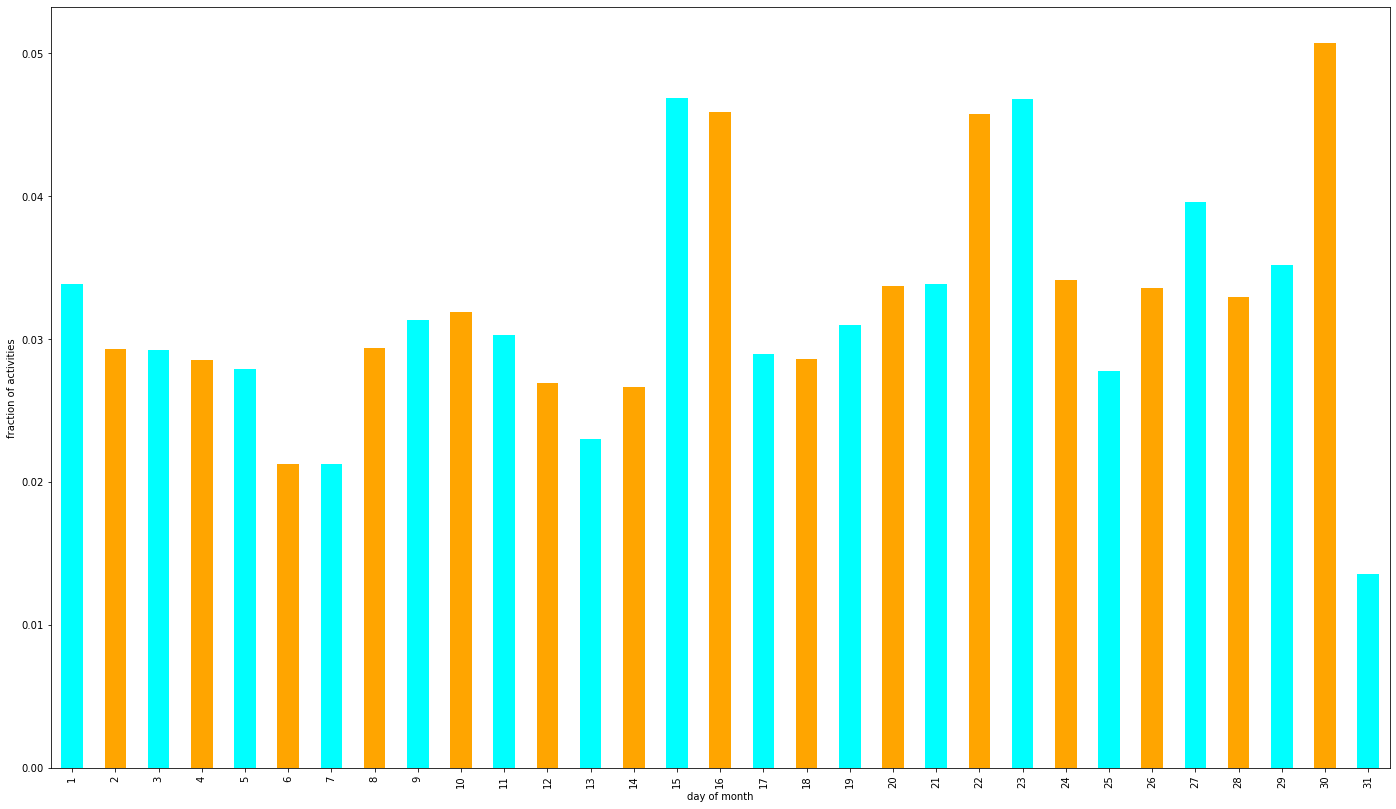

In [129]:
fig6, axis6 = plt.subplots(figsize=(24,14))

train_data['monthday'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axis6, color = ['cyan','orange'])

axis6.set_ylabel('fraction of activities')
axis6.set_xlabel('day of month')

Text(0, 0.5, 'Fraction of activites')

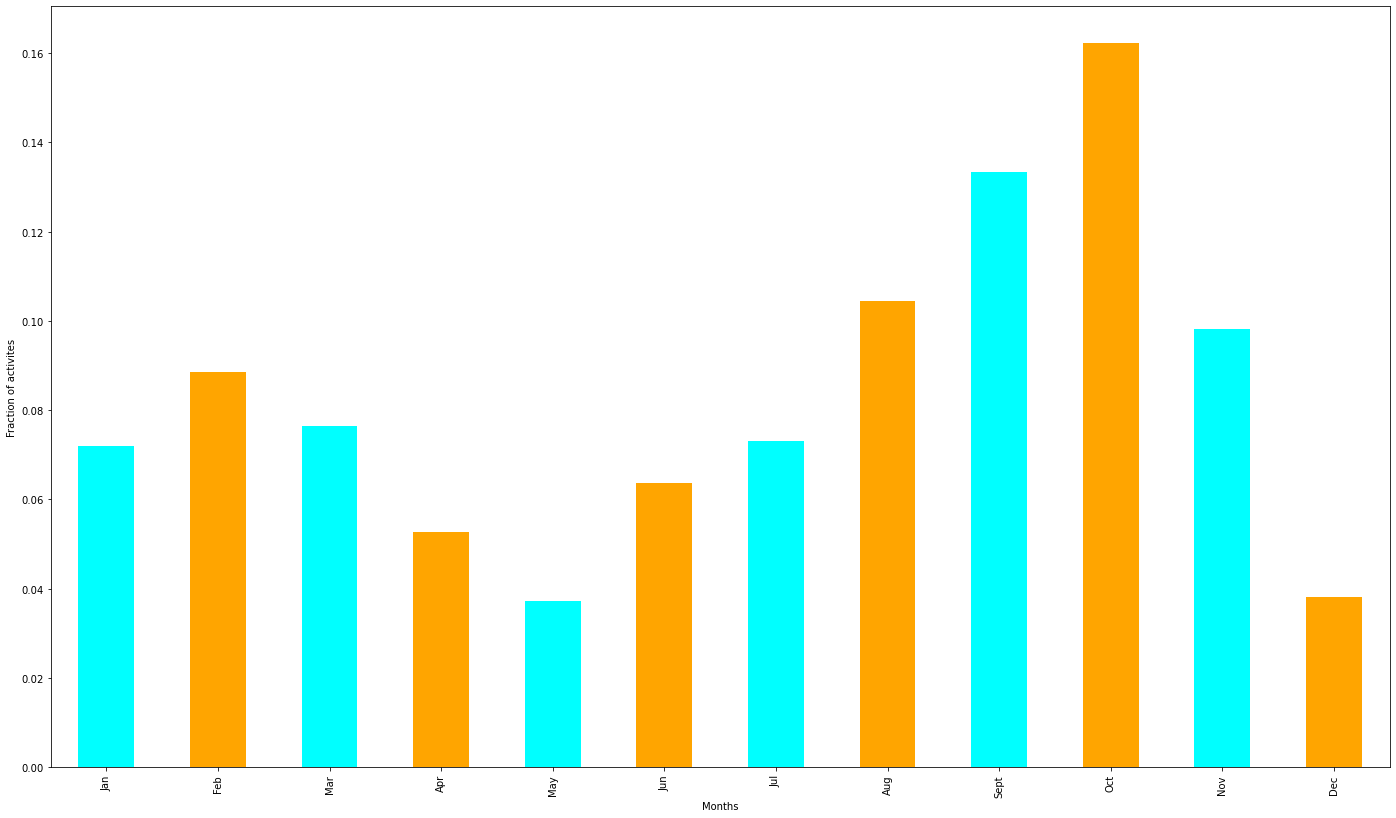

In [130]:
month_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]

map_month_year={}
for i,m in enumerate(month_list):
    map_month_year[i+1]=m

fraction_act_month = train_data['month'].value_counts(normalize=True).sort_index()

fraction_act_month.index =fraction_act_month.index.map(map_month_year)

fig7, axis7 = plt.subplots(figsize=(24,14))

fraction_act_month.plot(kind='bar', ax= axis7, color = ['cyan','orange'])

axis7.set_xlabel('Months')
axis7.set_ylabel('Fraction of activites')


In [131]:
quartile_75=train_data.groupby('people_id').count()['activity_id'].quantile(0.75)
quartile_25=train_data.groupby('people_id').count()['activity_id'].quantile(0.25)

outlier = quartile_75 + 1.5*(quartile_75-quartile_25)
outlier

32.0

In [132]:
import seaborn as sns

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


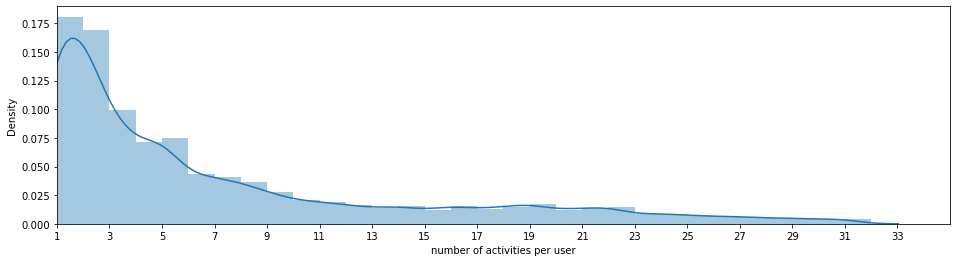

In [133]:
fig8, axis8 = plt.subplots(figsize=(16,4))

sns.distplot(train_data.groupby('people_id').count()['activity_id'][train_data.groupby('people_id').count()['activity_id']<outlier], ax=axis8, bins=range(0,35))
axis8.set_xlabel('number of activities per user')
axis8.set_xlim(1,35)
axis8.set_xticks(range(1,35, 2));

# Feature Engineering

In [134]:
# test_df = pd.read_csv('./Data/act_test.csv')
# people_df = pd.read_csv('./Data/people.csv')
# train_df = pd.read_csv('./Data/act_train.csv')

In [135]:
# Merging people data and activity train data over people_id:
# train_data = pd.merge(people_df, train_data, how ='inner', on = 'people_id')
# train_data.head()

In [136]:
# Merging people data and activity train data over people_id:
test_data = pd.merge(people_df, test_df, how ='inner', on = 'people_id')
test_data.head()

,people_id,ppl_date,ppl_group,ppl_char_1,ppl_char_2,ppl_char_3,ppl_char_4,ppl_char_5,ppl_char_6,ppl_char_7,...,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10
0,ppl_100004,2022-07-20,group 22593,type 2,type 3,type 40,type 25,type 9,type 4,type 16,...,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,type -1
1,ppl_100004,2022-07-20,group 22593,type 2,type 3,type 40,type 25,type 9,type 4,type 16,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 682
2,ppl_10001,2022-10-14,group 25417,type 2,type 3,type 6,type 6,type 4,type 1,type 1,...,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,type -1
3,ppl_10001,2022-10-14,group 25417,type 2,type 3,type 6,type 6,type 4,type 1,type 1,...,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,type -1
4,ppl_10001,2022-10-14,group 25417,type 2,type 3,type 6,type 6,type 4,type 1,type 1,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 3015


In [137]:
train_data['is_train']=1
test_data['is_train']=0
test_data['outcome']=np.NaN

In [138]:
full_data_train_plus_test=train_data.append(test_data,ignore_index=True,sort=True)

In [139]:
full_data_train_plus_test.dtypes

act_char_1                   object
act_char_10                  object
act_char_2                   object
act_char_3                   object
act_char_4                   object
act_char_5                   object
act_char_6                   object
act_char_7                   object
act_char_8                   object
act_char_9                   object
act_date             datetime64[ns]
activity_category            object
activity_id                  object
is_train                      int64
month                       float64
monthday                    float64
outcome                     float64
people_id                    object
ppl_char_1                   object
ppl_char_10                    bool
ppl_char_11                    bool
ppl_char_12                    bool
ppl_char_13                    bool
ppl_char_14                    bool
ppl_char_15                    bool
ppl_char_16                    bool
ppl_char_17                    bool
ppl_char_18                 

### group_ppl_cnt:Number of people per each group

In [140]:
ppl_group=full_data_train_plus_test['ppl_group'].values
dict_lis=dict(full_data_train_plus_test.groupby("ppl_group").people_id.nunique())
full_data_train_plus_test['group_ppl_cnt']=[dict_lis[i] for i in ppl_group ]

### days_from_min_dt_grp:Days passed from Min ppl date per group

In [141]:
dic_lis=dict(full_data_train_plus_test.groupby("ppl_group").ppl_date.min())
group_min_dt=[dic_lis[i] for i in ppl_group ]

In [142]:
group_1_ppl_dt=full_data_train_plus_test['ppl_date'].astype(int)

In [143]:
group_1_ppl_dt

0          1624924800000000000
1          1624924800000000000
2          1624924800000000000
3          1624924800000000000
4          1624924800000000000
                  ...         
2695973    1647043200000000000
2695974    1647043200000000000
2695975    1647043200000000000
2695976    1647043200000000000
2695977    1647043200000000000
Name: ppl_date, Length: 2695978, dtype: int64

In [144]:
group_1_ppl_dt = pd.to_datetime(group_1_ppl_dt)

In [145]:
tser=pd.Series(group_min_dt)

In [146]:
tser

0         2020-05-18
1         2020-05-18
2         2020-05-18
3         2020-05-18
4         2020-05-18
             ...    
2695973   2020-05-18
2695974   2020-05-18
2695975   2020-05-18
2695976   2020-05-18
2695977   2020-05-18
Length: 2695978, dtype: datetime64[ns]

In [147]:
full_data_train_plus_test['days_from_min_dt_grp']=(group_1_ppl_dt-tser).abs().dt.days

### days_from_min_dt_grp:Days passed from Max ppl date per group

In [148]:
dic_lis=dict(full_data_train_plus_test.groupby("ppl_group").ppl_date.max())
group_max_dt=[dic_lis[i] for i in ppl_group ]
tsermx=pd.Series(group_max_dt)
full_data_train_plus_test['days_from_max_dt_grp']=(tsermx-group_1_ppl_dt).abs().dt.days

### Mean,median of Char_38

In [149]:
full_data_train_plus_test['people_38_mean']=full_data_train_plus_test['ppl_char_38'].mean()
full_data_train_plus_test['people_38_median']=full_data_train_plus_test['ppl_char_38'].median()

In [150]:
print(full_data_train_plus_test['ppl_char_38'].mean())

50.748712341124445


In [151]:
print(full_data_train_plus_test['ppl_char_38'].median())

60.0


### group_activity_cnt:Number of activities per group

In [152]:
dic_lis=dict(full_data_train_plus_test.groupby("ppl_group").activity_id.nunique())
full_data_train_plus_test['group_activity_cnt']=[dict_lis[i] for i in ppl_group ]

### activt_per_ppl_cnt:Number of activities per people

In [153]:
people_id_list=full_data_train_plus_test['people_id'].values
dict_lis=dict(full_data_train_plus_test.groupby("people_id").activity_id.nunique())
full_data_train_plus_test['activt_per_ppl_cnt']=[dict_lis[i] for i in people_id_list ]

### ppl_actv_date_diff:Absolute difference between ppl dat and activity date

In [154]:
full_data_train_plus_test['ppl_actv_date_diff']=(full_data_train_plus_test['ppl_date']-full_data_train_plus_test['act_date']).abs().dt.days

### weekend:Weekend or not

In [155]:
full_data_train_plus_test['actvdayofweek']= full_data_train_plus_test['act_date'].dt.dayofweek
full_data_train_plus_test['weekend']=0
full_data_train_plus_test.loc[full_data_train_plus_test['actvdayofweek'].isin([5, 6]), 'weekend'] = 1

### actv_date_qurtr: Quarter of the activity

In [156]:
full_data_train_plus_test['act_date_qurtr']=full_data_train_plus_test['act_date'].dt.quarter

In [157]:
full_data_train_plus_test.head()

,act_char_1,act_char_10,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,...,days_from_min_dt_grp,days_from_max_dt_grp,people_38_mean,people_38_median,group_activity_cnt,activt_per_ppl_cnt,ppl_actv_date_diff,actvdayofweek,weekend,act_date_qurtr
0,type -1,type 76,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,...,407,793,50.748712,60.0,77314,6,788,5,1,3
1,type -1,type 1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,...,407,793,50.748712,60.0,77314,6,455,1,0,3
2,type -1,type 1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,...,407,793,50.748712,60.0,77314,6,455,1,0,3
3,type -1,type 1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,...,407,793,50.748712,60.0,77314,6,766,4,0,3
4,type -1,type 1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,...,407,793,50.748712,60.0,77314,6,788,5,1,3


In [158]:
train_data_with_new_features=full_data_train_plus_test.loc[full_data_train_plus_test["is_train"]==1]
test_data_with_new_features=full_data_train_plus_test.loc[full_data_train_plus_test["is_train"]==0]
train_outcomes=train_data_with_new_features['outcome'].values

In [159]:
test_data_with_new_features.reset_index(inplace=True)
test_data_with_new_features.head()

,index,act_char_1,act_char_10,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,...,days_from_min_dt_grp,days_from_max_dt_grp,people_38_mean,people_38_median,group_activity_cnt,activt_per_ppl_cnt,ppl_actv_date_diff,actvdayofweek,weekend,act_date_qurtr
0,2197291,type 5,type -1,type 10,type 5,type 1,type 6,type 1,type 1,type 7,...,356,0,50.748712,60.0,2,2,0,2,0,3
1,2197292,type -1,type 682,type -1,type -1,type -1,type -1,type -1,type -1,type -1,...,356,0,50.748712,60.0,2,2,0,2,0,3
2,2197293,type 12,type -1,type 1,type 5,type 4,type 6,type 1,type 1,type 13,...,345,252,50.748712,60.0,16,25,0,4,0,4
3,2197294,type 20,type -1,type 10,type 5,type 4,type 6,type 1,type 1,type 5,...,345,252,50.748712,60.0,16,25,44,6,1,4
4,2197295,type -1,type 3015,type -1,type -1,type -1,type -1,type -1,type -1,type -1,...,345,252,50.748712,60.0,16,25,1,5,1,4


In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_cv, y_train, y_cv = train_test_split(train_data_with_new_features, train_outcomes, test_size=0.30, stratify=train_outcomes)

In [162]:
positive_grp=X_train.loc[X_train["outcome"]==1.0]
negative_grp=X_train.loc[X_train["outcome"]==0.0]

In [163]:
positive_grp.shape

(682848, 70)

In [164]:
negative_grp.shape

(855255, 70)

In [165]:
from sklearn.utils import resample
positive_grp_up_sampled=resample(positive_grp, replace=True, n_samples=855255, random_state=123)

In [166]:
X_train = pd.concat([positive_grp_up_sampled, negative_grp], ignore_index =True)

In [167]:
y_train = X_train['outcome'].values

In [168]:
print("Shape of X Train", X_train.shape)
print("Shape of y Train", y_train.shape)

Shape of X Train (1710510, 70)
Shape of y Train (1710510,)


In [169]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [174]:
X_train.columns

Index(['act_char_1', 'act_char_10', 'act_char_2', 'act_char_3', 'act_char_4',
       'act_char_5', 'act_char_6', 'act_char_7', 'act_char_8', 'act_char_9',
       'act_date', 'activity_category', 'activity_id', 'is_train', 'month',
       'monthday', 'outcome', 'people_id', 'ppl_char_1', 'ppl_char_10',
       'ppl_char_11', 'ppl_char_12', 'ppl_char_13', 'ppl_char_14',
       'ppl_char_15', 'ppl_char_16', 'ppl_char_17', 'ppl_char_18',
       'ppl_char_19', 'ppl_char_2', 'ppl_char_20', 'ppl_char_21',
       'ppl_char_22', 'ppl_char_23', 'ppl_char_24', 'ppl_char_25',
       'ppl_char_26', 'ppl_char_27', 'ppl_char_28', 'ppl_char_29',
       'ppl_char_3', 'ppl_char_30', 'ppl_char_31', 'ppl_char_32',
       'ppl_char_33', 'ppl_char_34', 'ppl_char_35', 'ppl_char_36',
       'ppl_char_37', 'ppl_char_38', 'ppl_char_4', 'ppl_char_5', 'ppl_char_6',
       'ppl_char_7', 'ppl_char_8', 'ppl_char_9', 'ppl_date', 'ppl_group',
       'weekday', 'group_ppl_cnt', 'days_from_min_dt_grp',
       'days_from_

In [171]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['activity_category'].values.reshape(-1,1))

X_train_actv_cat=ohe.transform(X_train['activity_category'].values.reshape(-1,1))
X_cv_actv_cat=ohe.transform(X_cv['activity_category'].values.reshape(-1,1))
X_test_actv_cat=ohe.transform(test_data_with_new_features['activity_category'].values.reshape(-1,1))

In [175]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['activity_id'].values.reshape(-1,1))

X_train_actv_id=ohe.transform(X_train['activity_id'].values.reshape(-1,1))
X_cv_actv_id=ohe.transform(X_cv['activity_id'].values.reshape(-1,1))
X_test_actv_id=ohe.transform(test_data_with_new_features['activity_id'].values.reshape(-1,1))

In [176]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_date'].values.reshape(-1,1))

X_train_actv_day=ohe.transform(X_train['act_date'].values.reshape(-1,1))
X_cv_actv_day=ohe.transform(X_cv['act_date'].values.reshape(-1,1))
X_test_actv_day=ohe.transform(test_data_with_new_features['act_date'].values.reshape(-1,1))

In [177]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['actvdayofweek'].values.reshape(-1,1))

X_train_actv_dayowek=ohe.transform(X_train['actvdayofweek'].values.reshape(-1,1))
X_cv_actv_dayowek=ohe.transform(X_cv['actvdayofweek'].values.reshape(-1,1))
X_test_actv_dayowek=ohe.transform(test_data_with_new_features['actvdayofweek'].values.reshape(-1,1))

In [179]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['month'].values.reshape(-1,1))

X_train_actv_mnth=ohe.transform(X_train['month'].values.reshape(-1,1))
X_cv_actv_mnth=ohe.transform(X_cv['month'].values.reshape(-1,1))
X_test_actv_mnth=ohe.transform(test_data_with_new_features['month'].values.reshape(-1,1))

In [ ]:
# ohe=OneHotEncoder(handle_unknown='ignore')
# ohe.fit(X_train['actvweek'].values.reshape(-1,1))

# X_train_actv_week=ohe.transform(X_train['actvweek'].values.reshape(-1,1))
# X_cv_actv_week=ohe.transform(X_cv['actvweek'].values.reshape(-1,1))
# X_test_actv_week=ohe.transform(Test_dat['actvweek'].values.reshape(-1,1))

In [ ]:
# ohe=OneHotEncoder(handle_unknown='ignore')
# ohe.fit(X_train['actvyear'].values.reshape(-1,1))

# X_train_actv_year=ohe.transform(X_train['actvyear'].values.reshape(-1,1))
# X_cv_actv_year=ohe.transform(X_cv['actvyear'].values.reshape(-1,1))
# X_test_actv_year=ohe.transform(Test_dat['actvyear'].values.reshape(-1,1))

In [180]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_10'].values.reshape(-1,1))

X_train_ch10x=ohe.transform(X_train['ppl_char_10'].values.reshape(-1,1))
X_cv_actv_ch10x=ohe.transform(X_cv['ppl_char_10'].values.reshape(-1,1))
X_test_actv_ch10x=ohe.transform(test_data_with_new_features['ppl_char_10'].values.reshape(-1,1))

In [181]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_char_10'].values.reshape(-1,1))

X_train_ch10y=ohe.transform(X_train['act_char_10'].values.reshape(-1,1))
X_cv_actv_ch10y=ohe.transform(X_cv['act_char_10'].values.reshape(-1,1))
X_test_actv_ch10y=ohe.transform(test_data_with_new_features['act_char_10'].values.reshape(-1,1))

In [182]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_11'].values.reshape(-1,1))

X_train_ch11=ohe.transform(X_train['ppl_char_11'].values.reshape(-1,1))
X_cv_actv_ch11=ohe.transform(X_cv['ppl_char_11'].values.reshape(-1,1))
X_test_actv_ch11=ohe.transform(test_data_with_new_features['ppl_char_11'].values.reshape(-1,1))

In [183]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_12'].values.reshape(-1,1))

X_train_ch12=ohe.transform(X_train['ppl_char_12'].values.reshape(-1,1))
X_cv_actv_ch12=ohe.transform(X_cv['ppl_char_12'].values.reshape(-1,1))
X_test_actv_ch12=ohe.transform(test_data_with_new_features['ppl_char_12'].values.reshape(-1,1))

In [184]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_13'].values.reshape(-1,1))

X_train_ch13=ohe.transform(X_train['ppl_char_13'].values.reshape(-1,1))
X_cv_actv_ch13=ohe.transform(X_cv['ppl_char_13'].values.reshape(-1,1))
X_test_actv_ch13=ohe.transform(test_data_with_new_features['ppl_char_13'].values.reshape(-1,1))

In [185]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_14'].values.reshape(-1,1))

X_train_ch14=ohe.transform(X_train['ppl_char_14'].values.reshape(-1,1))
X_cv_actv_ch14=ohe.transform(X_cv['ppl_char_14'].values.reshape(-1,1))
X_test_actv_ch14=ohe.transform(test_data_with_new_features['ppl_char_14'].values.reshape(-1,1))

In [186]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_15'].values.reshape(-1,1))

X_train_ch15=ohe.transform(X_train['ppl_char_15'].values.reshape(-1,1))
X_cv_actv_ch15=ohe.transform(X_cv['ppl_char_15'].values.reshape(-1,1))
X_test_actv_ch15=ohe.transform(test_data_with_new_features['ppl_char_15'].values.reshape(-1,1))

In [187]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_16'].values.reshape(-1,1))

X_train_ch16=ohe.transform(X_train['ppl_char_16'].values.reshape(-1,1))
X_cv_actv_ch16=ohe.transform(X_cv['ppl_char_16'].values.reshape(-1,1))
X_test_actv_ch16=ohe.transform(test_data_with_new_features['ppl_char_16'].values.reshape(-1,1))

In [188]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_17'].values.reshape(-1,1))

X_train_ch17=ohe.transform(X_train['ppl_char_17'].values.reshape(-1,1))
X_cv_actv_ch17=ohe.transform(X_cv['ppl_char_17'].values.reshape(-1,1))
X_test_actv_ch17=ohe.transform(test_data_with_new_features['ppl_char_17'].values.reshape(-1,1))

In [189]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_18'].values.reshape(-1,1))

X_train_ch18=ohe.transform(X_train['ppl_char_18'].values.reshape(-1,1))
X_cv_actv_ch18=ohe.transform(X_cv['ppl_char_18'].values.reshape(-1,1))
X_test_actv_ch18=ohe.transform(test_data_with_new_features['ppl_char_18'].values.reshape(-1,1))

In [248]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_19'].values.reshape(-1,1))

X_train_ch19=ohe.transform(X_train['ppl_char_19'].values.reshape(-1,1))
X_cv_actv_ch19=ohe.transform(X_cv['ppl_char_19'].values.reshape(-1,1))
X_test_actv_ch19=ohe.transform(test_data_with_new_features['ppl_char_19'].values.reshape(-1,1))

In [190]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_char_1'].values.reshape(-1,1))

X_train_ch1x=ohe.transform(X_train['act_char_1'].values.reshape(-1,1))
X_cv_actv_ch1x=ohe.transform(X_cv['act_char_1'].values.reshape(-1,1))
X_test_actv_ch1x=ohe.transform(test_data_with_new_features['act_char_1'].values.reshape(-1,1))

In [191]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_1'].values.reshape(-1,1))

X_train_ch1y=ohe.transform(X_train['ppl_char_1'].values.reshape(-1,1))
X_cv_actv_ch1y=ohe.transform(X_cv['ppl_char_1'].values.reshape(-1,1))
X_test_actv_ch1y=ohe.transform(test_data_with_new_features['ppl_char_1'].values.reshape(-1,1))

In [192]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_20'].values.reshape(-1,1))

X_train_ch20=ohe.transform(X_train['ppl_char_20'].values.reshape(-1,1))
X_cv_actv_ch20=ohe.transform(X_cv['ppl_char_20'].values.reshape(-1,1))
X_test_actv_ch20=ohe.transform(test_data_with_new_features['ppl_char_20'].values.reshape(-1,1))

In [193]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_21'].values.reshape(-1,1))

X_train_ch21=ohe.transform(X_train['ppl_char_21'].values.reshape(-1,1))
X_cv_actv_ch21=ohe.transform(X_cv['ppl_char_21'].values.reshape(-1,1))
X_test_actv_ch21=ohe.transform(test_data_with_new_features['ppl_char_21'].values.reshape(-1,1))

In [194]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_22'].values.reshape(-1,1))

X_train_ch22=ohe.transform(X_train['ppl_char_22'].values.reshape(-1,1))
X_cv_actv_ch22=ohe.transform(X_cv['ppl_char_22'].values.reshape(-1,1))
X_test_actv_ch22=ohe.transform(test_data_with_new_features['ppl_char_22'].values.reshape(-1,1))

In [195]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_23'].values.reshape(-1,1))

X_train_ch23=ohe.transform(X_train['ppl_char_23'].values.reshape(-1,1))
X_cv_actv_ch23=ohe.transform(X_cv['ppl_char_23'].values.reshape(-1,1))
X_test_actv_ch23=ohe.transform(test_data_with_new_features['ppl_char_23'].values.reshape(-1,1))

In [196]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_24'].values.reshape(-1,1))

X_train_ch24=ohe.transform(X_train['ppl_char_24'].values.reshape(-1,1))
X_cv_actv_ch24=ohe.transform(X_cv['ppl_char_24'].values.reshape(-1,1))
X_test_actv_ch24=ohe.transform(test_data_with_new_features['ppl_char_24'].values.reshape(-1,1))

In [198]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_25'].values.reshape(-1,1))

X_train_ch25=ohe.transform(X_train['ppl_char_25'].values.reshape(-1,1))
X_cv_actv_ch25=ohe.transform(X_cv['ppl_char_25'].values.reshape(-1,1))
X_test_actv_ch25=ohe.transform(test_data_with_new_features['ppl_char_25'].values.reshape(-1,1))

In [199]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_26'].values.reshape(-1,1))

X_train_ch26=ohe.transform(X_train['ppl_char_26'].values.reshape(-1,1))
X_cv_actv_ch26=ohe.transform(X_cv['ppl_char_26'].values.reshape(-1,1))
X_test_actv_ch26=ohe.transform(test_data_with_new_features['ppl_char_26'].values.reshape(-1,1))

In [197]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_27'].values.reshape(-1,1))

X_train_ch27=ohe.transform(X_train['ppl_char_27'].values.reshape(-1,1))
X_cv_actv_ch27=ohe.transform(X_cv['ppl_char_27'].values.reshape(-1,1))
X_test_actv_ch27=ohe.transform(test_data_with_new_features['ppl_char_27'].values.reshape(-1,1))

In [201]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_28'].values.reshape(-1,1))

X_train_ch28=ohe.transform(X_train['ppl_char_28'].values.reshape(-1,1))
X_cv_actv_ch28=ohe.transform(X_cv['ppl_char_28'].values.reshape(-1,1))
X_test_actv_ch28=ohe.transform(test_data_with_new_features['ppl_char_28'].values.reshape(-1,1))

In [202]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_29'].values.reshape(-1,1))

X_train_ch29=ohe.transform(X_train['ppl_char_29'].values.reshape(-1,1))
X_cv_actv_ch29=ohe.transform(X_cv['ppl_char_29'].values.reshape(-1,1))
X_test_actv_ch29=ohe.transform(test_data_with_new_features['ppl_char_29'].values.reshape(-1,1))

In [200]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_char_2'].values.reshape(-1,1))

X_train_ch2x=ohe.transform(X_train['act_char_2'].values.reshape(-1,1))
X_cv_actv_ch2x=ohe.transform(X_cv['act_char_2'].values.reshape(-1,1))
X_test_actv_ch2x=ohe.transform(test_data_with_new_features['act_char_2'].values.reshape(-1,1))

In [203]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_2'].values.reshape(-1,1))

X_train_ch2y=ohe.transform(X_train['ppl_char_2'].values.reshape(-1,1))
X_cv_actv_ch2y=ohe.transform(X_cv['ppl_char_2'].values.reshape(-1,1))
X_test_actv_ch2y=ohe.transform(test_data_with_new_features['ppl_char_2'].values.reshape(-1,1))

In [204]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_30'].values.reshape(-1,1))

X_train_ch30=ohe.transform(X_train['ppl_char_30'].values.reshape(-1,1))
X_cv_actv_ch30=ohe.transform(X_cv['ppl_char_30'].values.reshape(-1,1))
X_test_actv_ch30=ohe.transform(test_data_with_new_features['ppl_char_30'].values.reshape(-1,1))

In [205]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_31'].values.reshape(-1,1))

X_train_ch31=ohe.transform(X_train['ppl_char_31'].values.reshape(-1,1))
X_cv_actv_ch31=ohe.transform(X_cv['ppl_char_31'].values.reshape(-1,1))
X_test_actv_ch31=ohe.transform(test_data_with_new_features['ppl_char_31'].values.reshape(-1,1))

In [206]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_32'].values.reshape(-1,1))

X_train_ch32=ohe.transform(X_train['ppl_char_32'].values.reshape(-1,1))
X_cv_actv_ch32=ohe.transform(X_cv['ppl_char_32'].values.reshape(-1,1))
X_test_actv_ch32=ohe.transform(test_data_with_new_features['ppl_char_32'].values.reshape(-1,1))

In [207]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_33'].values.reshape(-1,1))

X_train_ch33=ohe.transform(X_train['ppl_char_33'].values.reshape(-1,1))
X_cv_actv_ch33=ohe.transform(X_cv['ppl_char_33'].values.reshape(-1,1))
X_test_actv_ch33=ohe.transform(test_data_with_new_features['ppl_char_33'].values.reshape(-1,1))

In [250]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_34'].values.reshape(-1,1))

X_train_ch34=ohe.transform(X_train['ppl_char_34'].values.reshape(-1,1))
X_cv_actv_ch34=ohe.transform(X_cv['ppl_char_34'].values.reshape(-1,1))
X_test_actv_ch34=ohe.transform(test_data_with_new_features['ppl_char_34'].values.reshape(-1,1))

In [208]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_35'].values.reshape(-1,1))

X_train_ch35=ohe.transform(X_train['ppl_char_35'].values.reshape(-1,1))
X_cv_actv_ch35=ohe.transform(X_cv['ppl_char_35'].values.reshape(-1,1))
X_test_actv_ch35=ohe.transform(test_data_with_new_features['ppl_char_35'].values.reshape(-1,1))

In [209]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_36'].values.reshape(-1,1))

X_train_ch36=ohe.transform(X_train['ppl_char_36'].values.reshape(-1,1))
X_cv_actv_ch36=ohe.transform(X_cv['ppl_char_36'].values.reshape(-1,1))
X_test_actv_ch36=ohe.transform(test_data_with_new_features['ppl_char_36'].values.reshape(-1,1))

In [211]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_37'].values.reshape(-1,1))

X_train_ch37=ohe.transform(X_train['ppl_char_37'].values.reshape(-1,1))
X_cv_actv_ch37=ohe.transform(X_cv['ppl_char_37'].values.reshape(-1,1))
X_test_actv_ch37=ohe.transform(test_data_with_new_features['ppl_char_37'].values.reshape(-1,1))

In [210]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_char_3'].values.reshape(-1,1))

X_train_ch3x=ohe.transform(X_train['act_char_3'].values.reshape(-1,1))
X_cv_actv_ch3x=ohe.transform(X_cv['act_char_3'].values.reshape(-1,1))
X_test_actv_ch3x=ohe.transform(test_data_with_new_features['act_char_3'].values.reshape(-1,1))

In [212]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_3'].values.reshape(-1,1))

X_train_ch3y=ohe.transform(X_train['ppl_char_3'].values.reshape(-1,1))
X_cv_actv_ch3y=ohe.transform(X_cv['ppl_char_3'].values.reshape(-1,1))
X_test_actv_ch3y=ohe.transform(test_data_with_new_features['ppl_char_3'].values.reshape(-1,1))

In [213]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_char_4'].values.reshape(-1,1))

X_train_ch4x=ohe.transform(X_train['act_char_4'].values.reshape(-1,1))
X_cv_actv_ch4x=ohe.transform(X_cv['act_char_4'].values.reshape(-1,1))
X_test_actv_ch4x=ohe.transform(test_data_with_new_features['act_char_4'].values.reshape(-1,1))

In [214]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_4'].values.reshape(-1,1))

X_train_ch4Y=ohe.transform(X_train['ppl_char_4'].values.reshape(-1,1))
X_cv_actv_ch4y=ohe.transform(X_cv['ppl_char_4'].values.reshape(-1,1))
X_test_actv_ch4y=ohe.transform(test_data_with_new_features['ppl_char_4'].values.reshape(-1,1))

In [215]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_char_5'].values.reshape(-1,1))

X_train_ch5x=ohe.transform(X_train['act_char_5'].values.reshape(-1,1))
X_cv_actv_ch5x=ohe.transform(X_cv['act_char_5'].values.reshape(-1,1))
X_test_actv_ch5x=ohe.transform(test_data_with_new_features['act_char_5'].values.reshape(-1,1))

In [216]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_5'].values.reshape(-1,1))

X_train_ch5y=ohe.transform(X_train['ppl_char_5'].values.reshape(-1,1))
X_cv_actv_ch5y=ohe.transform(X_cv['ppl_char_5'].values.reshape(-1,1))
X_test_actv_ch5y=ohe.transform(test_data_with_new_features['ppl_char_5'].values.reshape(-1,1))

In [217]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_char_6'].values.reshape(-1,1))

X_train_ch6x=ohe.transform(X_train['act_char_6'].values.reshape(-1,1))
X_cv_actv_ch6x=ohe.transform(X_cv['act_char_6'].values.reshape(-1,1))
X_test_actv_ch6x=ohe.transform(test_data_with_new_features['act_char_6'].values.reshape(-1,1))

In [218]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_6'].values.reshape(-1,1))

X_train_ch6y=ohe.transform(X_train['ppl_char_6'].values.reshape(-1,1))
X_cv_actv_ch6y=ohe.transform(X_cv['ppl_char_6'].values.reshape(-1,1))
X_test_actv_ch6y=ohe.transform(test_data_with_new_features['ppl_char_6'].values.reshape(-1,1))

In [219]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_char_7'].values.reshape(-1,1))
\
X_train_ch7x=ohe.transform(X_train['act_char_7'].values.reshape(-1,1))
X_cv_actv_ch7x=ohe.transform(X_cv['act_char_7'].values.reshape(-1,1))
X_test_actv_ch7x=ohe.transform(test_data_with_new_features['act_char_7'].values.reshape(-1,1))

In [220]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_7'].values.reshape(-1,1))

X_train_ch7y=ohe.transform(X_train['ppl_char_7'].values.reshape(-1,1))
X_cv_actv_ch7y=ohe.transform(X_cv['ppl_char_7'].values.reshape(-1,1))
X_test_actv_ch7y=ohe.transform(test_data_with_new_features['ppl_char_7'].values.reshape(-1,1))

In [221]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_char_8'].values.reshape(-1,1))

X_train_ch8x=ohe.transform(X_train['act_char_8'].values.reshape(-1,1))
X_cv_actv_ch8x=ohe.transform(X_cv['act_char_8'].values.reshape(-1,1))
X_test_actv_ch8x=ohe.transform(test_data_with_new_features['act_char_8'].values.reshape(-1,1))

In [222]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_8'].values.reshape(-1,1))

X_train_ch8y=ohe.transform(X_train['ppl_char_8'].values.reshape(-1,1))
X_cv_actv_ch8y=ohe.transform(X_cv['ppl_char_8'].values.reshape(-1,1))
X_test_actv_ch8y=ohe.transform(test_data_with_new_features['ppl_char_8'].values.reshape(-1,1))

In [223]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_char_9'].values.reshape(-1,1))

X_train_ch9x=ohe.transform(X_train['act_char_9'].values.reshape(-1,1))
X_cv_actv_ch9x=ohe.transform(X_cv['act_char_9'].values.reshape(-1,1))
X_test_actv_ch9x=ohe.transform(test_data_with_new_features['act_char_9'].values.reshape(-1,1))

In [224]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_char_9'].values.reshape(-1,1))

X_train_ch9y=ohe.transform(X_train['ppl_char_9'].values.reshape(-1,1))
X_cv_actv_ch9y=ohe.transform(X_cv['ppl_char_9'].values.reshape(-1,1))
X_test_actv_ch9y=ohe.transform(test_data_with_new_features['ppl_char_9'].values.reshape(-1,1))

In [225]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppl_group'].values.reshape(-1,1))

X_train_grp1=ohe.transform(X_train['ppl_group'].values.reshape(-1,1))
X_cv_actv_grp1=ohe.transform(X_cv['ppl_group'].values.reshape(-1,1))
X_test_actv_grp1=ohe.transform(test_data_with_new_features['ppl_group'].values.reshape(-1,1))

In [226]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['people_id'].values.reshape(-1,1))

X_train_pplid=ohe.transform(X_train['people_id'].values.reshape(-1,1))
X_cv_actv_pplid=ohe.transform(X_cv['people_id'].values.reshape(-1,1))
X_test_actv_pplid=ohe.transform(test_data_with_new_features['people_id'].values.reshape(-1,1))

In [228]:
# ohe=OneHotEncoder(handle_unknown='ignore')
# ohe.fit(X_train['pplday'].values.reshape(-1,1))

# X_train_pplday=ohe.transform(X_train['pplday'].values.reshape(-1,1))
# X_cv_actv_pplday=ohe.transform(X_cv['pplday'].values.reshape(-1,1))
# X_test_actv_pplday=ohe.transform(test_data_with_new_features['pplday'].values.reshape(-1,1))

In [230]:
# ohe=OneHotEncoder(handle_unknown='ignore')
# ohe.fit(X_train['ppldayofweek'].values.reshape(-1,1))

# X_train_ppldayowk=ohe.transform(X_train['ppldayofweek'].values.reshape(-1,1))
# X_cv_actv_ppldayowk=ohe.transform(X_cv['ppldayofweek'].values.reshape(-1,1))
# X_test_actv_ppldayowk=ohe.transform(test_data_with_new_features['ppldayofweek'].values.reshape(-1,1))

In [ ]:
# ohe=OneHotEncoder(handle_unknown='ignore')
# ohe.fit(X_train['pplmonth'].values.reshape(-1,1))

# X_train_pplmnth=ohe.transform(X_train['pplmonth'].values.reshape(-1,1))
# X_cv_actv_pplmnth=ohe.transform(X_cv['pplmonth'].values.reshape(-1,1))
# X_test_actv_pplmnth=ohe.transform(Test_dat['pplmonth'].values.reshape(-1,1))

In [ ]:
# ohe=OneHotEncoder(handle_unknown='ignore')
# ohe.fit(X_train['pplweek'].values.reshape(-1,1))

# X_train_pplweek=ohe.transform(X_train['pplweek'].values.reshape(-1,1))
# X_cv_actv_pplweek=ohe.transform(X_cv['pplweek'].values.reshape(-1,1))
# X_test_actv_pplweek=ohe.transform(Test_dat['pplweek'].values.reshape(-1,1))

In [ ]:
# ohe=OneHotEncoder(handle_unknown='ignore')
# ohe.fit(X_train['pplyear'].values.reshape(-1,1))

# X_train_pplyear=ohe.transform(X_train['pplyear'].values.reshape(-1,1))
# X_cv_actv_pplyear=ohe.transform(X_cv['pplyear'].values.reshape(-1,1))
# X_test_actv_pplyear=ohe.transform(Test_dat['pplyear'].values.reshape(-1,1))

In [231]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['weekend'].values.reshape(-1,1))

X_train_weekend=ohe.transform(X_train['weekend'].values.reshape(-1,1))
X_cv_actv_weekend=ohe.transform(X_cv['weekend'].values.reshape(-1,1))
X_test_actv_weekend=ohe.transform(test_data_with_new_features['weekend'].values.reshape(-1,1))

In [234]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['act_date_qurtr'].values.reshape(-1,1))

X_train_actvdtqrtr=ohe.transform(X_train['act_date_qurtr'].values.reshape(-1,1))
X_cv_actv_actvdtqrtr=ohe.transform(X_cv['act_date_qurtr'].values.reshape(-1,1))
X_test_actv_actvdtqrtr=ohe.transform(test_data_with_new_features['act_date_qurtr'].values.reshape(-1,1))

# Normalization

In [236]:
from sklearn.preprocessing import Normalizer
stdsclr = Normalizer()

In [237]:
stdsclr.fit(X_train['ppl_char_38'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
X_train_ch38 = stdsclr.transform(X_train['ppl_char_38'].values.reshape(-1, 1))
X_cv_ch38 = stdsclr.transform(X_cv['ppl_char_38'].values.reshape(-1, 1))
X_test_ch38 = stdsclr.transform(test_data_with_new_features['ppl_char_38'].values.reshape(-1, 1))


In [238]:
stdsclr.fit(X_train['group_ppl_cnt'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
X_train_grpplcnt = stdsclr.transform(X_train['group_ppl_cnt'].values.reshape(-1, 1))
X_cv_grpplcnt = stdsclr.transform(X_cv['group_ppl_cnt'].values.reshape(-1, 1))
X_test_grpplcnt = stdsclr.transform(test_data_with_new_features['group_ppl_cnt'].values.reshape(-1, 1))

In [239]:
stdsclr.fit(X_train['days_from_min_dt_grp'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
X_train_daysfrmmindt = stdsclr.transform(X_train['days_from_min_dt_grp'].values.reshape(-1, 1))
X_cv_daysfrmmindt = stdsclr.transform(X_cv['days_from_min_dt_grp'].values.reshape(-1, 1))
X_test_daysfrmmindt = stdsclr.transform(test_data_with_new_features['days_from_min_dt_grp'].values.reshape(-1, 1))

In [240]:
stdsclr.fit(X_train['days_from_max_dt_grp'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
X_train_daysfrmmaxdt = stdsclr.transform(X_train['days_from_max_dt_grp'].values.reshape(-1, 1))
X_cv_daysfrmmaxdt = stdsclr.transform(X_cv['days_from_max_dt_grp'].values.reshape(-1, 1))
X_test_daysfrmmaxdt = stdsclr.transform(test_data_with_new_features['days_from_max_dt_grp'].values.reshape(-1, 1))

In [241]:
stdsclr.fit(X_train['group_activity_cnt'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
X_train_grpactvcnt = stdsclr.transform(X_train['group_activity_cnt'].values.reshape(-1, 1))
X_cv_grpactvcnt = stdsclr.transform(X_cv['group_activity_cnt'].values.reshape(-1, 1))
X_test_grpactvcnt = stdsclr.transform(test_data_with_new_features['group_activity_cnt'].values.reshape(-1, 1))

In [242]:
stdsclr.fit(X_train['activt_per_ppl_cnt'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
X_train_actvpplcnt = stdsclr.transform(X_train['activt_per_ppl_cnt'].values.reshape(-1, 1))
X_cv_actvpplcnt = stdsclr.transform(X_cv['activt_per_ppl_cnt'].values.reshape(-1, 1))
X_test_actvpplcnt = stdsclr.transform(test_data_with_new_features['activt_per_ppl_cnt'].values.reshape(-1, 1))

In [243]:
stdsclr.fit(X_train['ppl_actv_date_diff'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
X_train_pplactvdtdif = stdsclr.transform(X_train['ppl_actv_date_diff'].values.reshape(-1, 1))
X_cv_pplactvdtdif = stdsclr.transform(X_cv['ppl_actv_date_diff'].values.reshape(-1, 1))
X_test_pplactvdtdif = stdsclr.transform(test_data_with_new_features['ppl_actv_date_diff'].values.reshape(-1, 1))

In [258]:
from scipy.sparse import hstack
X_tr_S1 = hstack((X_train_actv_cat,X_train_actv_id,X_train_actv_day,X_train_actv_dayowek,X_train_actv_mnth,X_train_ch10x,X_train_ch10y,X_train_ch11,X_train_ch12,X_train_ch13,X_train_ch14,X_train_ch15,X_train_ch16,X_train_ch17,X_train_ch18,X_train_ch19,X_train_ch1x,X_train_ch1y,X_train_ch20,X_train_ch21,X_train_ch22,X_train_ch23,X_train_ch24,X_train_ch25,X_train_ch26,X_train_ch27,X_train_ch28,X_train_ch29,X_train_ch2x,X_train_ch2y,X_train_ch30,X_train_ch31,X_train_ch32,X_train_ch33,X_train_ch34,X_train_ch35,X_train_ch36,X_train_ch37,X_train_ch3x,X_train_ch3y,X_train_ch4x,X_train_ch4Y,X_train_ch5x,X_train_ch5y,X_train_ch6x,X_train_ch6y,X_train_ch7x,X_train_ch7y,X_train_ch8x,X_train_ch8y,X_train_ch9x,X_train_ch9y,X_train_grp1,X_train_pplid,X_train_weekend,X_train_actvdtqrtr,X_train_ch38,X_train_grpplcnt,X_train_daysfrmmindt,X_train_daysfrmmaxdt,X_train_grpactvcnt,X_train_actvpplcnt,X_train_pplactvdtdif)).tocsr()
X_cr_S1 = hstack((X_cv_actv_cat,X_cv_actv_id,X_cv_actv_day,X_cv_actv_dayowek,X_cv_actv_mnth,X_cv_actv_ch10x,X_cv_actv_ch10y,X_cv_actv_ch11,X_cv_actv_ch12,X_cv_actv_ch13,X_cv_actv_ch14,X_cv_actv_ch15,X_cv_actv_ch16,X_cv_actv_ch17,X_cv_actv_ch18,X_cv_actv_ch19,X_cv_actv_ch1x,X_cv_actv_ch1y,X_cv_actv_ch20,X_cv_actv_ch21,X_cv_actv_ch22,X_cv_actv_ch23,X_cv_actv_ch24,X_cv_actv_ch25,X_cv_actv_ch26,X_cv_actv_ch27,X_cv_actv_ch28,X_cv_actv_ch29,X_cv_actv_ch2x,X_cv_actv_ch2y,X_cv_actv_ch30,X_cv_actv_ch31,X_cv_actv_ch32,X_cv_actv_ch33,X_cv_actv_ch34,X_cv_actv_ch35,X_cv_actv_ch36,X_cv_actv_ch37,X_cv_actv_ch3x,X_cv_actv_ch3y,X_cv_actv_ch4x,X_cv_actv_ch4y,X_cv_actv_ch5x,X_cv_actv_ch5y,X_cv_actv_ch6x,X_cv_actv_ch6y,X_cv_actv_ch7x,X_cv_actv_ch7y,X_cv_actv_ch8x,X_cv_actv_ch8y,X_cv_actv_ch9x,X_cv_actv_ch9y,X_cv_actv_grp1,X_cv_actv_pplid,X_cv_actv_weekend,X_cv_actv_actvdtqrtr,X_cv_ch38,X_cv_grpplcnt,X_cv_daysfrmmindt,X_cv_daysfrmmaxdt,X_cv_grpactvcnt,X_cv_actvpplcnt,X_cv_pplactvdtdif)).tocsr()
X_te_S1 = hstack((X_test_actv_cat,X_test_actv_id,X_test_actv_day,X_test_actv_dayowek,X_test_actv_mnth,X_test_actv_ch10x,X_test_actv_ch10y,X_test_actv_ch11,X_test_actv_ch12,X_test_actv_ch13,X_test_actv_ch14,X_test_actv_ch15,X_test_actv_ch16,X_test_actv_ch17,X_test_actv_ch18,X_test_actv_ch19,X_test_actv_ch1x,X_test_actv_ch1y,X_test_actv_ch20,X_test_actv_ch21,X_test_actv_ch22,X_test_actv_ch23,X_test_actv_ch24,X_test_actv_ch25,X_test_actv_ch26,X_test_actv_ch27,X_test_actv_ch28,X_test_actv_ch29,X_test_actv_ch2x,X_test_actv_ch2y,X_test_actv_ch30,X_test_actv_ch31,X_test_actv_ch32,X_test_actv_ch33,X_test_actv_ch34,X_test_actv_ch35,X_test_actv_ch36,X_test_actv_ch37,X_test_actv_ch3x,X_test_actv_ch3y,X_test_actv_ch4x,X_test_actv_ch4y,X_test_actv_ch5x,X_test_actv_ch5y,X_test_actv_ch6x,X_test_actv_ch6y,X_test_actv_ch7x,X_test_actv_ch7y,X_test_actv_ch8x,X_test_actv_ch8y,X_test_actv_ch9x,X_test_actv_ch9y,X_test_actv_grp1,X_test_actv_pplid,X_test_actv_weekend,X_test_actv_actvdtqrtr,X_test_ch38,X_test_grpplcnt,X_test_daysfrmmindt,X_test_daysfrmmaxdt,X_test_grpactvcnt,X_test_actvpplcnt,X_test_pplactvdtdif)).tocsr()

In [259]:
X_tr_S1.shape

(1710510, 1514807)

In [260]:
from sklearn.linear_model import SGDClassifier
LR = SGDClassifier(loss='log',alpha=0.00001, n_iter_no_change=200,n_jobs=-1)
LR.fit(X_tr_S1, y_train)

y_test_pred = LR.predict(X_te_S1)